### (Classroom Section: Project 4 Advanced Lane Finding)
## L17: Undistort and Transform Quiz 
### My Solution:

In an effort to reuse the Quiz code in my local Environment, I will copy some files from "Camera Calibration Quiz" into the local root where this notebook runs.  

**Note**: *'wide_dist_pickle.p'* was created in *"camera Calibration Quiz"*
Online Quiz has this file in root directory,  
so I will copy the file from *'./calibration_wide'* folder to root.  

The test image *"test_image2.png"* used in the quiz is the same as *'./calibration_wide/GOPR0032.jpg'" from the *"camera Calibration Quiz"*.  
I shall copy this file as well, changing the name to *'test_image2,png'* to this root directory, for the same reason.  

**Note2**:, if *"CameraCalibration.ibynb"* has not been run, then *'wide_dist_pickle.p'* may not exist anywhere locally.  



In [1]:
import pickle
import cv2

%matplotlib inline

# This is a hack to copy pickle file from './calibtration_wide' folder to root
dist_pickle = pickle.load( open( "calibration_wide/wide_dist_pickle.p", "rb" ) )
pickle.dump(  dist_pickle, open(                  "wide_dist_pickle.p", "wb" ) )

# This is a hack to copy jpg image file from './calibration_wide' folder to root
img = cv2.imread('calibration_wide/GOPR0032.jpg')

# save jpg as png file to root
cv2.imwrite('test_image2.png', img) 


True

(48, 1, 2)
4 coordinates chosen from undistorted image:
[[  436.42312622   114.37910461]
 [ 1104.60473633   225.2769928 ]
 [  465.47521973   768.95635986]
 [ 1075.69372559   658.26062012]] 

1280 960
142.22222222222223 137.14285714285714 grid width, height in undistorted, transformed image
4 corresponding coordinates on unWarped image:
[[  142.222229     137.14285278]
 [ 1137.77783203   137.14285278]
 [  142.222229     822.8571167 ]
 [ 1137.77783203   822.8571167 ]] 

(1280, 960)


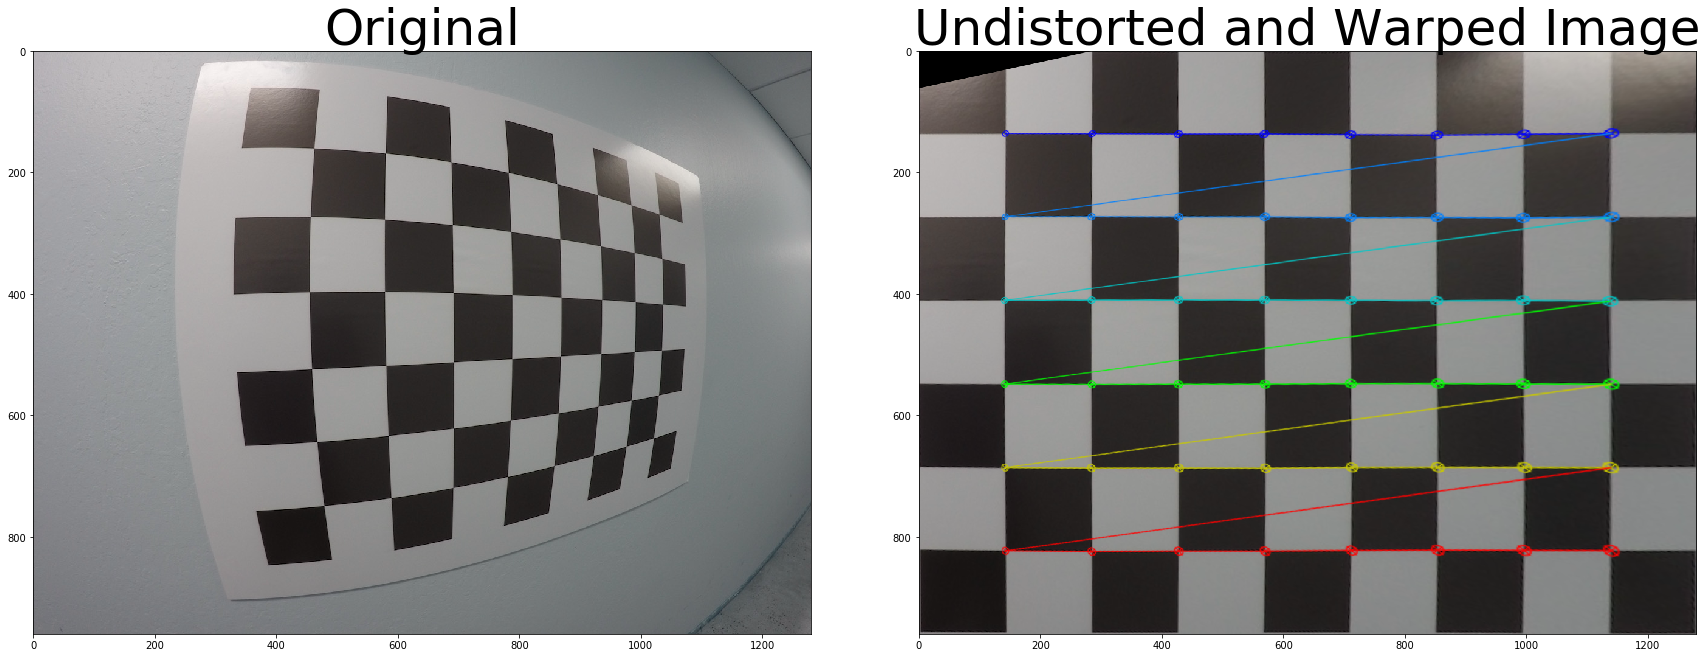

In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx  = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# curiosity: see what these coefficients look like
# print(' mtx[0]: ',  mtx[0])
# print('dist[0]: ', dist[0])
# print()


# Read in an image
img = cv2.imread('test_image2.png')

# store orig image's pixel dimensions (for use in warpPerspective)
height = img.shape[0]
width  = img.shape[1]
image_size = (width, height)


# Chessboard grid "dimensions"
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

def corners_unwarp(img, nx, ny, mtx, dist):
    # 1) Undistort using mtx and dist
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    
    # 2) Convert to grayscale
    gray_undistorted = cv2.cvtColor(undistorted, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray_undistorted, (nx,ny), None)
    #print(corners.shape, '\n', corners)
    
    # 4) If corners found:
    if ret == True:
            # a) draw corners
            # create undistorted image, with corners drawn on it
            undistorted_with_corners =  cv2.drawChessboardCorners(undistorted, (nx,ny), corners, ret)
            
            # Doesn't Work Online (either method that I tried: 1st is error, 2nd is invisible
            # # plot undistorted_with_corners image:
            # # cv2.imshow('undistorted_with_corners', undistorted_with_corners)
            # f1, (ax1) = plt.subplots(1, 1, figsize=(24, 9))
            # f1.tight_layout()
            # ax1.imshow(undistorted_with_corners)
            # ax1.set_title('Undistorted With Corners Drawn', fontsize=50)
            # #plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
            # cv2.waitKey(1000)            
 
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
                 
            # I'll use grid coordinates [0,0], [0, nx-1], [ny-1, nx], [nx,ny]
            # src = np.float32([corners[0][0],         corners[7][0],  
            #                   corners[40][0],        corners[47][0]])
            # ie ordered as: TL,TR,BL,BR
            # print(corners[0][0],         corners[nx-1][0])
            # print(corners[nx*(ny-1)][0], corners[nx*ny-1][0])
            print(corners.shape)
            print('4 coordinates chosen from undistorted image:')
            src = np.float32([corners[nx*(0)][0],    corners[(nx*1) -1][0],  
                              corners[nx*(ny-1)][0], corners[(nx*ny)-1][0]]) 
            print(src, '\n')
                 
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])

            # width and height of final image (pixels) == undistorted size = img size
            width, height = (undistorted.shape[1], undistorted.shape[0])
            print(width, height)

            # width and height of squares in unwarped image (pixels)
            grid_width_x =  width/(nx+1)  # nx lines ==> nx+1 equally spaced squares
            grid_height_y = height/(ny+1)
            print(grid_width_x, grid_height_y, 'grid width, height in undistorted, transformed image')
            
            # margin = 0 #15 #px
            dst = np.float32([[    0+grid_width_x,      0+grid_height_y], 
                              [width-grid_width_x,      0+grid_height_y], 
                              [    0+grid_width_x, height-grid_height_y], 
                              [width-grid_width_x, height-grid_height_y]])
            # dst = np.float32([[    0+margin+grid_width_x,      0+margin+grid_height_y], 
            #                   [width-margin-grid_width_x,      0+margin+grid_height_y], 
            #                   [    0+margin+grid_width_x, height-margin-grid_height_y], 
            #                   [width-margin-grid_width_x, height-margin-grid_height_y]])
                              
            print('4 corresponding coordinates on unWarped image:')
            print(dst, '\n')
            
            
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            M = cv2.getPerspectiveTransform(src, dst)

            # e) use cv2.warpPerspective() to warp your image to a top-down view
            image_size = (undistorted.shape[1], undistorted.shape[0])
            print(image_size)
            # warped = cv2.warpPerspective(undistorted, M, image_size, flags=cv2.INTER_LINEAR)
            warped = cv2.warpPerspective(undistorted_with_corners, M, image_size) #default: flags=cv2.INTER_LINEAR)
    else: 
        print ("corners not found, could not perform warpPerspective on undistorted img")
        print(ret, corners)
        print(nx, ny, undistorted.shape)
        # send back the grayscale undistorted image.  This will show in odd colors, standing out !
        warped = gray_undistorted #undistorted
        M = 0
            
    if (plot_as_online_quiz == False):
        # return 2 altered images to plot
        return warped, M, undistorted_with_corners  #gray_undistorted, #undistorted
    else:
        # return only warped image
        return warped, M


# Online Quiz requires two plots
plot_as_online_quiz = True
# # Personally, I like seeing 3 plots
# plot_as_online_quiz = False

# Get Unwarped Image
if plot_as_online_quiz:
    top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
    
    # Plot Images:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    
    # Before
    ax1.imshow(img)
    ax1.set_title('Original', fontsize=50)
    
    # After
    ax2.imshow(top_down)
    ax2.set_title('Undistorted and Warped Image', fontsize=50)
    
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

else:
    top_down, perspective_M, undist = corners_unwarp(img, nx, ny, mtx, dist)
    
    # Plot Images:
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    
    # Original
    ax1.imshow(img)
    ax1.set_title('Original', fontsize=50)
    
    # Undistorted
    ax2.imshow(undist)
    ax2.set_title('Undistort', fontsize=50)
    
    # Perspective Warp Correction on Undistorted
    ax3.imshow(top_down)
    ax3.set_title('Perspective Warp', fontsize=50)
    
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    


### Undistort and Transform 

<img src='./L_17_Example_undist-and-warp.png' \>
#### ReadMe - Quiz Instructions

Here's a tricky quiz for you! You have now seen how to find corners, calibrate your camera, undistort an image, and apply a perspective transform. Now it's your chance to perform all these steps on an image. In the last quiz you calibrated the camera, so here I'm giving you the camera matrix, `mtx`, and the distortion coefficients `dist` to start with.

Your goal is to generate output like the image shown above. To do that, you need to write a function that takes your distorted image as input and completes the following steps:

  - Undistort the image using cv2.undistort() with mtx and dist
  - Convert to grayscale
  - Find the chessboard corners
  - Draw corners
  - Define 4 source points (the outer 4 corners detected in the chessboard pattern)
  - Define 4 destination points (must be listed in the same order as src points!)
  - Use `cv2.getPerspectiveTransform()` to get `M`, the transform matrix
  - Use `cv2.warpPerspective()` to apply `M` and warp your image to a top-down view
**HINT**: Source points are the x and y pixel values of any four corners on your chessboard, you can extract these from the `corners` array output from `cv2.findChessboardCorners()`. Your destination points are the x and y pixel values of where you want those four corners to be mapped to in the output image.
If you run into any *errors* as you run your code, please refer to the **Examples of Useful Code** section in the previous video and make sure that your code syntax matches up! For this example, please also refer back to the examples in the *Calibrating Your Camera* video (L 10 of Project: Advanced Lane Finding Section)

In [3]:
""" 
#This is the Quiz Start File:
    
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    #delete the next two lines
    M = None
    warped = np.copy(img) 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
"""

''


''